In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

In [2]:
# read all csv files into dataframes
courses_df = pd.read_csv('D:\Python_Project_by_Manohar_sir\courses.csv',parse_dates=['created_on','last_updated_on'],dayfirst=True)
users_df = pd.read_csv(r'D:\Python_Project_by_Manohar_sir\users.csv',parse_dates=['date_of_birth','registration_date'],dayfirst=True)
ratings_df = pd.read_csv(r'D:\Python_Project_by_Manohar_sir\ratings.csv',parse_dates=['first_reviewed_on','last_updated_on'],dayfirst=True)
enrollment_df = pd.read_csv('D:\Python_Project_by_Manohar_sir\enrollments.csv',parse_dates=['enrollment_date'],dayfirst=True)
payments_df = pd.read_csv('D:\Python_Project_by_Manohar_sir\payments.csv',parse_dates=['transaction_date'],dayfirst=True)
refunds_df = pd.read_csv(r'D:\Python_Project_by_Manohar_sir\refunds.csv',parse_dates=['refund_date'],dayfirst=True)

In [3]:
print('Users Dataframe columns:',users_df.columns.tolist(),'\n')
print('Courses Dataframe columns:',courses_df.columns.tolist(),'\n')
print('Ratings Dataframe columns:',ratings_df.columns.tolist(),'\n')
print('Enrollment Dataframe columns:',enrollment_df.columns.tolist(),'\n')
print('Payments Dataframe columns:',payments_df.columns.tolist(),'\n')
print('Refunds Dataframe columns:',refunds_df.columns.tolist(),'\n')

Users Dataframe columns: ['user_id', 'name', 'date_of_birth', 'email', 'gender', 'category', 'registration_date', 'country', 'last_login_date', 'user_type'] 

Courses Dataframe columns: ['course_id', 'title', 'category', 'language', 'subtitles', 'price', 'instructor_id', 'length', 'difficulty_level', 'created_on', 'last_updated_on', 'number_of_videos', 'number_of_quizzes', 'view_count', 'average_watch_duration', 'certification_available', 'completion_rate', 'bookmark_count'] 

Ratings Dataframe columns: ['review_id', 'course_id', 'student_id', 'rating', 'review_text', 'first_reviewed_on', 'last_updated_on', 'helpful_count', 'reported_count'] 

Enrollment Dataframe columns: ['enrollment_id', 'student_id', 'course_id', 'enrollment_date'] 

Payments Dataframe columns: ['payment_id', 'enrollment_id', 'discount_percent', 'amount_paid', 'coupon_code', 'payment_method', 'transaction_date', 'transaction_id', 'payment_status'] 

Refunds Dataframe columns: ['refund_id', 'enrollment_id', 'refund_

In [4]:
# how many courses are free and how many courses have a price associated with them?
print('Free courses and paid courses:')
free_courses= courses_df[courses_df['price']==0].shape[0]
paid_courses = courses_df[courses_df['price']>0].shape[0]
print(f'Free courses: {free_courses}, Paid_couses: {paid_courses}')

Free courses and paid courses:
Free courses: 18, Paid_couses: 45


In [5]:
# How many corses is each instructor teaching on the platform?
instructor_teaching = courses_df['instructor_id'].value_counts()
print(f'no of courses {instructor_teaching}')

no of courses instructor_id
457246    6
220585    5
871007    5
668495    4
536923    4
751788    3
712134    3
582060    3
767050    3
838186    3
525207    3
278667    3
204568    2
764597    2
632410    2
288315    2
173468    2
742878    2
417012    1
241479    1
364202    1
424379    1
295438    1
370558    1
Name: count, dtype: int64


In [6]:
# which courses are the most popular based on the number of bookmarks?
popular_courses = courses_df.nlargest(5,'bookmark_count')
print(f"most popular courses based on book marks\n{popular_courses[['title','bookmark_count']]}")

most popular courses based on book marks
                                            title  bookmark_count
34                Genetics: From DNA to Evolution             485
13                             Python Masterclass             476
24  Physics Made Simple: Fundamentals to Advanced             458
11       Instructional Design for Online Learning             452
15            Leadership and Strategic Management             450


In [7]:
# how many users are registered in each user category?
no_of_users = users_df['category'].value_counts()
print(f'User registered in each category\n{no_of_users}')

User registered in each category
category
retired      766
homemaker    744
student      717
working      715
Name: count, dtype: int64


In [8]:
# what is the male to female ratio among the users?
gender_ratio = users_df['gender'].value_counts()
male_to_female_ratio = gender_ratio['male']/gender_ratio['female']
print(f'male to female ratio: {male_to_female_ratio:.2f}')


male to female ratio: 1.52


In [9]:
# which course have the worst completion rates?
wort_course=courses_df.nsmallest(5,'completion_rate')
print(f"worst courses rates :\n {wort_course [['title','completion_rate']]}")

worst courses rates :
                                                title  completion_rate
27             Biology: Understanding the Human Body            12.52
7                    Introduction to Quantum Physics            12.88
17  Project Management: From Initiation to Execution            13.52
14                     Digital Marketing Masterclass            16.09
22                 Photography: From Beginner to Pro            16.54


In [10]:
# how many unique users are enrolled in atleast one course?
unique_users = enrollment_df ['student_id'].nunique()
print(f'unique users enrolled in at least one course: {unique_users}')

unique users enrolled in at least one course: 261


In [11]:
# how many users are enrolled in multiple courses?
multiple_enrollments = enrollment_df['student_id'].value_counts()
users_multiple_courses = (multiple_enrollments>1).sum()
print(f"users enrolled in multiple courses : {users_multiple_courses}")

users enrolled in multiple courses : 14


In [12]:
# which 5 courses have the most enrololment?
top_courses =  enrollment_df['course_id'].value_counts().nlargest(5)
print(f"most enrolled courses:\n {top_courses}")

most enrolled courses:
 course_id
76064    20
64796    19
92956    18
79177    18
13258    15
Name: count, dtype: int64


In [13]:
# find the total revenue generated from successful payments
total_revenue = payments_df[payments_df['payment_status']=='success']['amount_paid'].sum()
print(f"Successful payments : ${total_revenue}")

Successful payments : $3770.5


In [14]:
# what is the average discount percentage applied across all discounted payments?
avg_discounts = payments_df[payments_df['discount_percent']>0]['discount_percent'].mean()
print(f"average discount percentage : {avg_discounts:.2f}%")

average discount percentage : 16.35%


In [15]:
# find top 3 countries with the highest number of student
top_countries = users_df['country'].value_counts().nlargest(3)
print(f'Top countries with highest number of student:\n{top_countries}')

Top countries with highest number of student:
country
India    1163
US        865
China     526
Name: count, dtype: int64


In [16]:
# what is the most common reason for refunds?
reason_refund = refunds_df['refund_reason'].mode()[0]
print(f'most common reason for refunds: {reason_refund}')

most common reason for refunds: Course content not satisfactory


In [17]:
# add an age column to the users table and then calculate average age of the students on the website.
users_df['date_of_birth']=pd.to_datetime(users_df['date_of_birth'])
users_df['age']=(datetime.now() - users_df['date_of_birth']).dt.days//365
average_age = users_df['age'].mean()
print(f'average age of students: {average_age:.2f}')

average age of students: 41.84


In [18]:
# find the average of the students in each course.
avg_age_per_course = enrollment_df.merge(users_df[['user_id','age']],left_on='student_id',right_on='user_id').groupby('course_id')['age'].mean()
print(f'average age of students in each course:\n{avg_age_per_course}')

average age of students in each course:
course_id
13258    41.800000
18426    39.846154
20195    51.000000
21108    37.785714
21248    38.500000
22005    69.000000
27385    47.000000
27431    15.500000
30371    41.800000
30790    48.000000
31874    34.000000
32369    38.625000
33057    42.500000
39766    23.000000
45770    36.200000
48950    80.000000
49963    29.461538
51293    47.363636
54046    43.000000
54145    47.888889
56446    42.000000
56799    42.500000
59716    17.000000
62276    34.000000
62660    30.000000
64561    66.666667
64796    39.894737
65005    33.625000
67194    35.000000
72387    62.500000
76064    42.750000
78724    49.250000
79177    40.000000
85886    26.000000
86558    48.000000
86724    47.000000
89472    24.000000
92956    49.777778
93178    38.000000
93568    54.000000
93619    43.266667
96323    54.000000
97039    41.000000
97988    41.066667
99133    50.000000
Name: age, dtype: float64


In [19]:
# find average age of the students in each course category.
avg_age_per_category = enrollment_df.merge(users_df[['user_id','age']],left_on='student_id',right_on='user_id').merge(courses_df[['course_id','category']],on='course_id').groupby('category')['age'].mean()
print(f'average age of students in each course category:\n{avg_age_per_category}')

average age of students in each course category:
category
Arts and Design               43.700000
Business and Management       42.812500
Education                     39.549296
Health                        43.228571
Personal Development          65.000000
Science and Mathematics       39.906977
Technology and Programming    41.619048
Name: age, dtype: float64


In [20]:
# calculate the average age of users for each user category
avg_age = users_df.groupby('category')['age'].mean()
print(f'average age of users for each user category:\n{avg_age}')

average age of users for each user category:
category
homemaker    42.067204
retired      41.798956
student      41.297071
working      42.172028
Name: age, dtype: float64


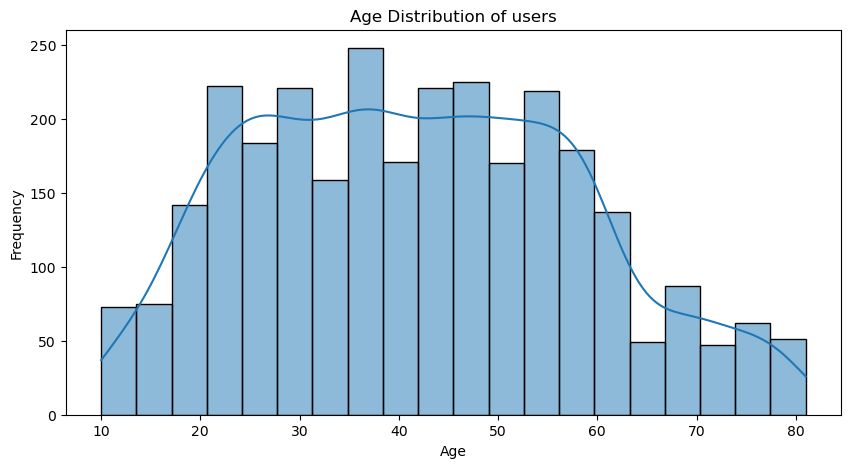

In [21]:
# plot the age distribution of all the users.
plt.figure(figsize=(10,5))
sns.histplot(users_df['age'],bins=20,kde=True)
plt.title('Age Distribution of users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

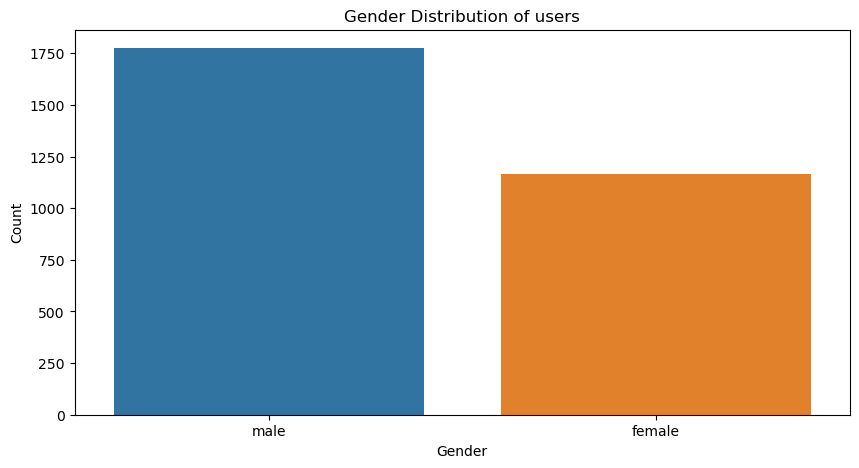

In [22]:
# plot the gender disrtibution to understand the gender breakdown of users
plt.figure(figsize=(10,5))
sns.countplot(data=users_df,x='gender')
plt.title('Gender Distribution of users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

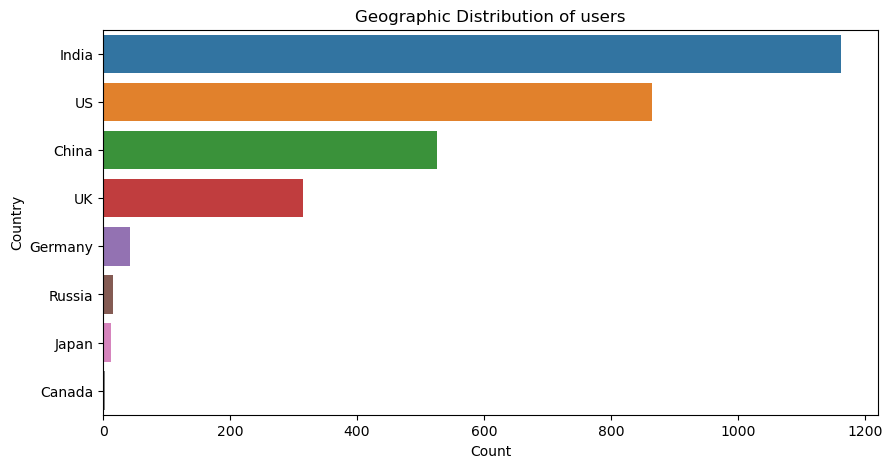

In [23]:
# plot the geographic distribution of users (based on country)
plt.figure(figsize=(10,5))
sns.countplot(data=users_df,y='country',order=users_df['country'].value_counts().index)
plt.title('Geographic Distribution of users')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

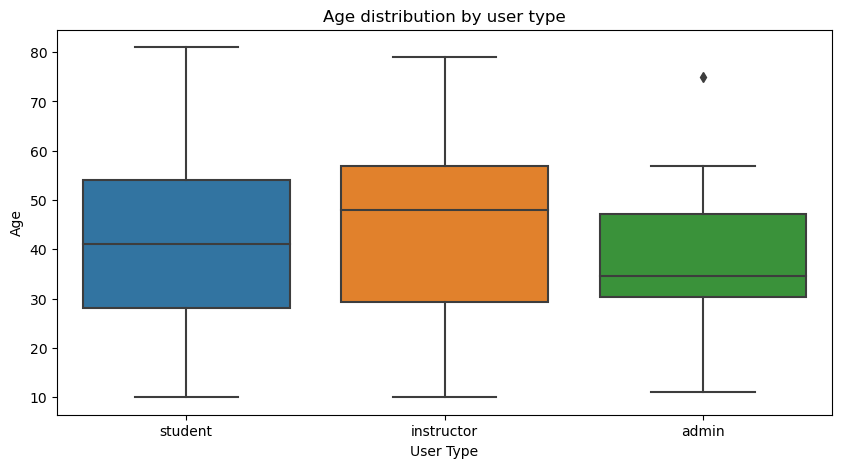

In [24]:
# show how the age distribution varies for different user types
plt.figure(figsize=(10,5))
sns.boxplot(data=users_df,x='user_type',y='age')
plt.title('Age distribution by user type')
plt.xlabel('User Type')
plt.ylabel('Age')
plt.show()

In [25]:
#  find the top 5 most popular courses based on view counts.
viewed_courses = courses_df.nlargest(5,'view_count')
print(f"top 5 most popular courses based on view counts:\n{viewed_courses[['title','view_count']]}")

top 5 most popular courses based on view counts:
                                    title  view_count
29    Full-Stack Web Development Bootcamp        9989
27  Biology: Understanding the Human Body        9821
35     Mastering React: Advanced Concepts        9445
33     Marine Biology: Life Under the Sea        9320
34        Genetics: From DNA to Evolution        9230


In [26]:
# what is the average course duration per category?
courses_df['length']=pd.to_numeric(courses_df['length'], errors='coerce')
avg_duration_per_category = courses_df.groupby('category')['length'].mean()
print(f"average course duration per category:\n{avg_duration_per_category}")

average course duration per category:
category
Arts and Design              NaN
Business and Management      NaN
Education                    NaN
Health                       NaN
Personal Development         NaN
Science and Mathematics      NaN
Technology and Programming   NaN
Name: length, dtype: float64


In [27]:
# find the top 5 highest revenue generating courses.
revenue_per_course = enrollment_df.merge(payments_df,on='enrollment_id').groupby('course_id')['amount_paid'].sum().nlargest(5)
print(f"top 5 highest revenue generating courses:\n{revenue_per_course}")

top 5 highest revenue generating courses:
course_id
64561    345.80
78724    335.80
56446    295.25
21248    278.00
62660    249.00
Name: amount_paid, dtype: float64


In [28]:
# what is the average transaction amount for each payment method?
avg_amount = payments_df.groupby('payment_method')['amount_paid'].mean()
print(f'average transaction amount for each payment method:\n{avg_amount}')

average transaction amount for each payment method:
payment_method
PayPal    81.346667
UPI       89.202632
card      99.450000
Name: amount_paid, dtype: float64


In [29]:
# calculate the average rating for each course and add a column average rating in course_df
avg_rating = ratings_df.groupby('course_id')['rating'].mean()
courses_df['average_rating'] = courses_df['course_id'].map(avg_rating)
print(f"average rating for each course and add a column average rating in course_df\n{avg_rating}")

average rating for each course and add a column average rating in course_df
course_id
12938    4.600000
13258    3.666667
18426    3.800000
20195    4.000000
20671    5.000000
21108    3.800000
21248    4.000000
22005    3.857143
23531    4.800000
27385    4.125000
27431    4.666667
30371    2.000000
30790    4.000000
31874    4.000000
32369    4.666667
33057    4.375000
39766    4.333333
42258    4.500000
45749    4.500000
48950    3.333333
49963    4.000000
51293    3.428571
51452    4.600000
53452    5.000000
54046    4.250000
54145    4.000000
56446    4.142857
56799    3.666667
56956    4.500000
57353    4.000000
59716    2.000000
60079    3.333333
62276    4.666667
62660    4.666667
64561    5.000000
64796    4.000000
65005    4.250000
67194    4.500000
68511    2.500000
69513    4.500000
71838    4.200000
72387    4.000000
74770    3.500000
76064    3.800000
77946    4.666667
78724    3.400000
79177    4.333333
85886    4.666667
86558    3.750000
86724    4.500000
89472    3.000

In [30]:
# Top 2 rated courses in each category
top_course = courses_df.groupby('category')['average_rating'].nlargest(2).reset_index(level=0)
top_course = top_course.merge(courses_df[['category','title','average_rating']], on=['category','average_rating'],how='left')
print(f"top 2 rated courses in eacg category:\n{top_course[['category','title','average_rating']]}")

top 2 rated courses in eacg category:
                      category  \
0              Arts and Design   
1              Arts and Design   
2              Arts and Design   
3      Business and Management   
4      Business and Management   
5                    Education   
6                    Education   
7                    Education   
8                    Education   
9                       Health   
10                      Health   
11        Personal Development   
12        Personal Development   
13     Science and Mathematics   
14     Science and Mathematics   
15     Science and Mathematics   
16     Science and Mathematics   
17     Science and Mathematics   
18     Science and Mathematics   
19  Technology and Programming   
20  Technology and Programming   

                                                title  average_rating  
0                   Photography: From Beginner to Pro        5.000000  
1     Graphic Design Essentials: Tools and Techniques        4.666667

In [31]:
# display the average rating of each course category.
avg_rating = courses_df.groupby('category')['average_rating'].mean()
print(f"average rating of each course category\n{avg_rating}")

average rating of each course category
category
Arts and Design               4.426667
Business and Management       4.276667
Education                     4.015152
Health                        4.191005
Personal Development          3.533333
Science and Mathematics       3.951667
Technology and Programming    4.025680
Name: average_rating, dtype: float64


In [32]:
# calculate the average rating for each instructor.
avg_rating = ratings_df.merge(courses_df[['course_id','instructor_id']],on='course_id').groupby('instructor_id')['rating'].mean()
print(f"average rating for each instructor:\n{avg_rating}")

average rating for each instructor:
instructor_id
173468    4.000000
204568    4.000000
220585    4.240000
241479    4.125000
278667    3.583333
288315    3.625000
295438    4.000000
364202    4.333333
370558    4.500000
417012    3.800000
424379    4.200000
457246    4.333333
525207    4.000000
536923    4.400000
582060    4.153846
632410    4.400000
668495    3.866667
712134    4.083333
742878    4.666667
751788    4.181818
764597    4.000000
767050    3.750000
838186    3.833333
871007    3.944444
Name: rating, dtype: float64


In [33]:
# display course with no ratings.
course_rating = courses_df[courses_df['average_rating'].isnull()]
print(f"courses with no ratings:\n{course_rating[['title']]}")

courses with no ratings:
                                            title
1              Advanced Mathematics for Engineers
24  Physics Made Simple: Fundamentals to Advanced
28                   Introduction to Astrophysics
44            Mental Health Awareness and Support


In [34]:
# find courses that have no students enrolled in them.
enrolled = enrollment_df['course_id'].unique()
no_enrolled_course =courses_df[courses_df['course_id'].isin(enrolled)] 
print(f"courses that have no students enrolled in them :\n{no_enrolled_course[['title']]}")

courses that have no students enrolled in them :
                                                title
0                         Data structures through C++
1                  Advanced Mathematics for Engineers
2             Advanced Data structures through Python
3                     First Aid and CPR Certification
4              Managing Diabetes and Chronic Diseases
5        How to Teach Reading and Writing Effectively
6     Environmental Science: Understanding Ecosystems
7                     Introduction to Quantum Physics
8       Creative Writing: Crafting Compelling Stories
9            Teaching Strategies for the 21st Century
10       Classroom Management: Techniques for Success
11           Instructional Design for Online Learning
12             Early Childhood Education Fundamentals
13                                 Python Masterclass
14                      Digital Marketing Masterclass
15                Leadership and Strategic Management
16             Financial Analysis

In [35]:
# find the number of students from each country based on thier enrollments
std_country = enrollment_df.merge(users_df[['user_id','country']],left_on='student_id',right_on='user_id').groupby('country')['student_id'].nunique()
print(f"number of students from each country based on thier enrollments:\n{std_country}")

number of students from each country based on thier enrollments:
country
China      54
Germany     6
India      95
UK         35
US         71
Name: student_id, dtype: int64


In [36]:
# get the course popularity details by country.
course_pop = enrollment_df.merge(users_df[['user_id','country']], left_on='student_id',right_on='user_id').groupby(['country','course_id']).size().reset_index(name='enrollment_count')
most_popular = course_pop.loc[course_pop.groupby('country')['enrollment_count'].idxmax()]
print(f"course popularity details by country:\n{most_popular}")

course popularity details by country:
    country  course_id  enrollment_count
9     China      49963                 5
25  Germany      27385                 1
59    India      93619                 9
74       UK      64796                 5
94       US      64796                 8


In [37]:
# find the top 5 bestselling paid courses.
best_selling = enrollment_df.merge(payments_df[payments_df['amount_paid']>0],
                                  on='enrollment_id').groupby('course_id')['amount_paid'].sum().nlargest(5)
print(f"top 5 best selling paid courses:\n{best_selling}")

top 5 best selling paid courses:
course_id
64561    345.80
78724    335.80
56446    295.25
21248    278.00
62660    249.00
Name: amount_paid, dtype: float64


In [38]:
# find the bestselling course in each category.
best_selling_category = (enrollment_df.merge(payments_df, on='enrollment_id').merge(courses_df, on='course_id')
                        .groupby(['course_id','category'])['amount_paid'].sum().reset_index())
best_selling_category = (best_selling_category.loc[best_selling_category.groupby('category')['amount_paid'].idxmax()])
print(f"best selling course in each category:\n{best_selling_category}")

best selling course in each category:
    course_id                    category  amount_paid
15      64561             Arts and Design       345.80
18      78724                   Education       335.80
25      96323                      Health       173.70
26      99133        Personal Development        99.00
14      62660     Science and Mathematics       249.00
10      56446  Technology and Programming       295.25


In [39]:
# calculate the number of free enrollments and paid enrollments
free_enrollments = enrollment_df[enrollment_df['enrollment_id'].isin(payments_df[payments_df['amount_paid']==0]['enrollment_id'])].shape[0]
paid_enrollments = enrollment_df[enrollment_df['enrollment_id'].isin(payments_df[payments_df['amount_paid']>0]['enrollment_id'])].shape[0]
print(f"free and paid enrollments:\nfree enrollments:{free_enrollments}\npaid enrollments:{paid_enrollments}")

free and paid enrollments:
free enrollments:0
paid enrollments:43


In [40]:
# find correlation between the number of videos and the completion rate
corr_vid_completion = courses_df['number_of_videos'].corr(courses_df['completion_rate'])
print(f"correlation between the number of videos and the completion rate:\n{corr_vid_completion:.2f}")

correlation between the number of videos and the completion rate:
-0.07


In [41]:
# find the correlation between number of quizzes and average rating for each course.
corr_quizzes_rating = courses_df['number_of_quizzes'].corr(courses_df['average_rating'])
print(f"correlation between the number of videos and the completion rate\n{corr_quizzes_rating:.2f}")

correlation between the number of videos and the completion rate
-0.21


In [42]:
# how many payment transaction failed using paypal?
failed = payments_df[(payments_df['payment_method']=='Paypal')& (payments_df['payment_status']=='failed')].shape[0]
print(f"failed transaction:\n{failed}")

failed transaction:
0


In [43]:
# get a summary of payment methods including how many successful, failed or pending are there for each method.
payment_summary = payments_df.groupby(['payment_method','payment_status']).size().unstack(fill_value=0)
print(payment_summary)

payment_status  failed  pending  success
payment_method                          
PayPal               1        0       14
UPI                  0        1       18
card                 0        0       11


In [44]:
# display the courses that were never refunded
refunded = refunds_df['enrollment_id'].unique()
non_refunded = courses_df[~courses_df['course_id'].isin(refunded)]
print(f"non_refunded:\n{non_refunded[['title']]}")

non_refunded:
                                                title
0                         Data structures through C++
1                  Advanced Mathematics for Engineers
2             Advanced Data structures through Python
3                     First Aid and CPR Certification
4              Managing Diabetes and Chronic Diseases
..                                                ...
58               AI and Deep Learning with TensorFlow
59                          Gamification in Education
60  Educational Psychology: Enhancing Learning Out...
61           Developing Curriculum for K-12 Education
62                   Childhood Education Fundamentals

[63 rows x 1 columns]


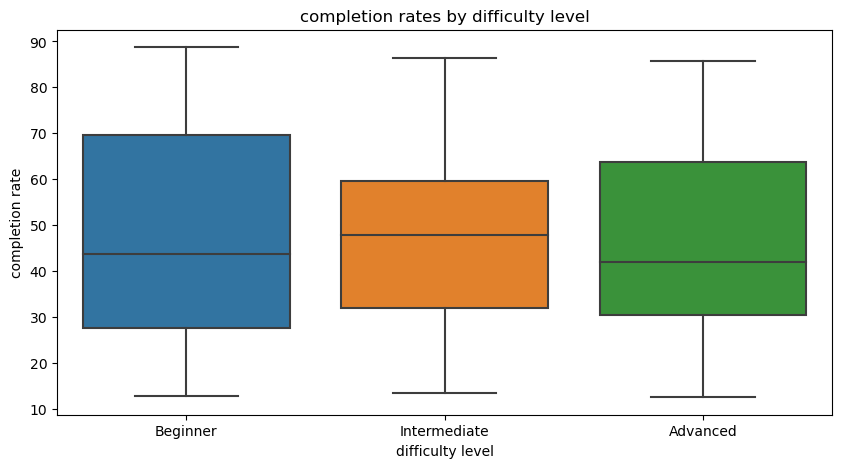

In [45]:
# use box plot to plot distribution of completion rates by difficulty level.
plt.figure(figsize=(10,5))
sns.boxplot(data=courses_df, x='difficulty_level',y='completion_rate')
plt.title('completion rates by difficulty level')
plt.xlabel('difficulty level')
plt.ylabel('completion rate')
plt.show()

In [46]:
# identify the course category with the most enrollments
most_enrolled = enrollment_df.merge(courses_df[['course_id','category']],
                                   on='course_id').groupby('category')['student_id'].nunique().idxmax()
print(f"course category with the most enrollments:{most_enrolled}")

course category with the most enrollments:Education


In [47]:
# find the number of inactive users - users who have not logged in during last 30 days.
users_df['last_login_date'] = pd.to_datetime(users_df['last_login_date'],format='%d-%m-%y',errors='coerce')
users_df_cleaned = users_df.dropna(subset=['last_login_date'])
inactive_users = users_df_cleaned[users_df_cleaned['last_login_date']<(datetime.now()-timedelta(days=30))]
print(f"number of inactive users :{inactive_users.shape[0]}")

number of inactive users :0


In [48]:
# what is the average price of courses in each category?
avg_price_per_category = courses_df[courses_df['price']>0].groupby('category')['price'].mean()
print(f"average price of courses in each category:{avg_price_per_category}")

average price of courses in each category:category
Arts and Design                71.000000
Business and Management        81.000000
Education                      94.000000
Health                         93.000000
Personal Development           90.800000
Science and Mathematics       124.900000
Technology and Programming    116.727273
Name: price, dtype: float64


In [49]:
# how many courses are available with subtitles?
courses_subtitles = courses_df[courses_df['subtitles']=='yes'].shape[0]
print(f"courses available with subtitles:{courses_subtitles}")

courses available with subtitles:55


In [50]:
# what percentage of courses offer certifications?
certification_percentage = (courses_df[courses_df['certification_available']=='yes'].shape[0]/courses_df.shape[0]*100)
print(f'percentage of courses offering certifications : {certification_percentage:.2f}')

percentage of courses offering certifications : 66.67


In [51]:
# what is the average time gap between a users registration date and their enrollment date?
users_enrollment_dates = enrollment_df.merge(users_df[['user_id','registration_date']],left_on='student_id',right_on='user_id')
users_enrollment_dates['time_gap'] = (pd.to_datetime(users_enrollment_dates['enrollment_date']
                                                    )-pd.to_datetime(users_enrollment_dates['registration_date'])).dt.days
avrg_time_gap = users_enrollment_dates['time_gap'].mean()
print(f"average time gap between registration and first enrollment:{avrg_time_gap:.2f}days")


average time gap between registration and first enrollment:937.40days


In [52]:
# get the email address and names of users who have signed up but not enrolled in any course.
non_enrolled_users = users_df[~users_df['user_id'].isin(enrollment_df['student_id'])]
print(f"users who have signed up but not enrolled in any course:{non_enrolled_users[['email','name']]}")

users who have signed up but not enrolled in any course:                               email                name
0          garzaanthony@robinson.org        Allison Hill
1                lindsay78@gmail.com        George Davis
2           jacqueline19@jackson.biz           Mark Diaz
3             julie69@cox-osborn.com        Thomas Ellis
4               cartereric@gmail.com        Alexandra Le
...                              ...                 ...
2937           williamhill@gmail.com       Stacy Russell
2938           rebeccahunt@yahoo.com     Tammy Marsh DDS
2939          andrew73@rodriguez.org         Kevin Floyd
2940   hjohnston@shields-sanchez.net      Nancy Galloway
2941  gcurry@espinoza-rodriguez.info  Walter Cochran DDS

[2681 rows x 2 columns]


In [54]:
# analyze monthly new user growth to understand monthly trends?
users_df['registration_date'] = pd.to_datetime(users_df['registration_date'])
users_df['registration_month'] = users_df['registration_date'].dt.to_period('M')
monthly_new_users = users_df.groupby('registration_month').size()
print(f"monthly new user growth:\n{monthly_new_users}")

monthly new user growth:
registration_month
2020-01    59
2020-02    41
2020-03    46
2020-04    46
2020-05    50
           ..
2024-09    52
2024-10    50
2024-11    49
2024-12    51
2025-01    25
Freq: M, Length: 61, dtype: int64


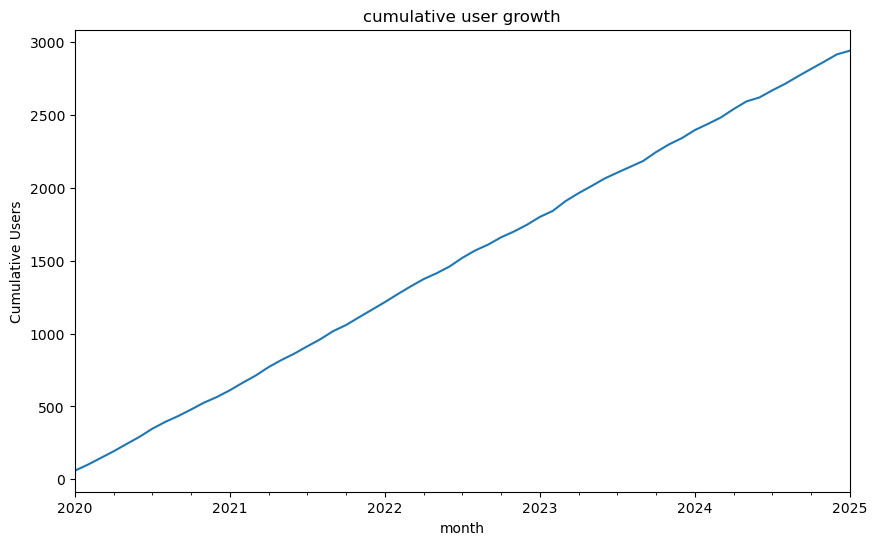

In [56]:
# calculate and plot the cumulative user growth.
cumulative_user_growth = monthly_new_users.cumsum()
plt.figure(figsize=(10,6))
cumulative_user_growth.plot()
plt.title('cumulative user growth')
plt.xlabel('month')
plt.ylabel('Cumulative Users')
plt.show()

In [58]:
# generate the monthly revenue report.
payments_df['transaction_date'] = pd.to_datetime(payments_df['transaction_date'])
payments_df['payment_month'] = payments_df['transaction_date'].dt.to_period('M')
monthly_revenue = payments_df.groupby('payment_month')['amount_paid'].sum()
print(f"monthly revenue report:\n{monthly_revenue}")

monthly revenue report:
payment_month
2025-01    4009.0
Freq: M, Name: amount_paid, dtype: float64


In [60]:
# generate the annual revenue report.
payments_df['payment_year']= payments_df['transaction_date'].dt.to_period('Y')
annual_revenue = payments_df.groupby('payment_year')['amount_paid'].sum()
print(f"Annual revenue:\n{annual_revenue}")

Annual revenue:
payment_year
2025    4009.0
Freq: A-DEC, Name: amount_paid, dtype: float64


In [74]:
# analyze whether there are more purchase in weekdays or weekends.
payments_df['day_of_week']=payments_df['transaction_date'].dt.dayofweek
weekday_purchase = payments_df[payments_df['day_of_week']<5].shape[0]
weekend_purchase = payments_df[payments_df['day_of_week']>=5].shape[0]
print(f"weekday purchases:{weekday_purchase}\nweekend purchase:{weekend_purchase}")

weekday purchases:30
weekend purchase:15


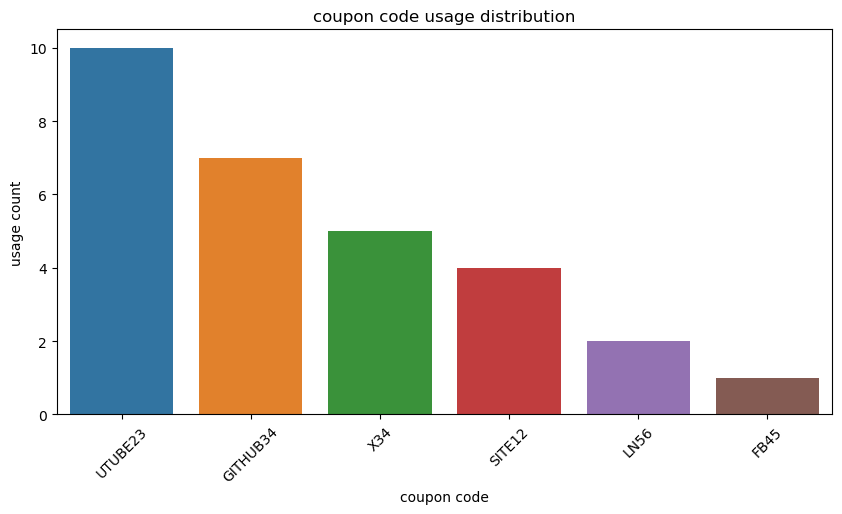

In [78]:
# which coupon code is used most frequently? visualize the distribution of coupon code usage.
most_used  = payments_df['coupon_code'].mode()[0]
coupon_usage= payments_df['coupon_code'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=coupon_usage.index, y=coupon_usage.values)
plt.title('coupon code usage distribution')
plt.xlabel('coupon code')
plt.ylabel('usage count')
plt.xticks(rotation=45)
plt.show()

In [83]:
# analyze compltion rates by country.
completion_rate = enrollment_df.merge(users_df[['user_id','country']],left_on='student_id',right_on='user_id').merge(courses_df[
                                                                                                                    ['course_id','completion_rate']],on='course_id').groupby('country')['completion_rate'].mean()
print(f"completion rates by country:\n{completion_rate}")


completion rates by country:
country
China      41.676271
Germany    47.893333
India      45.494800
UK         39.162162
US         43.602800
Name: completion_rate, dtype: float64
